All code is based on the xarray library in python which provides a very simple way to organize multidimensional data and thus also meteorological (space,time,parameters) data. You can find a simple introduction (45 min) here: https://tutorial.xarray.dev/overview/xarray-in-45-min.html

This notebook shows you the data you are provided for the task and how to open/manipulate it in xarray

*** Further information

* You will work with solar radiation, this is different than irradiance in that is an aggregate while irradiance is instantenous (measured at this time step). A value at 10:00 thus means the solar radiation of the last hour. 

# Reading in netcdf

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
ds = xr.open_dataset("assets/data_2017_germany.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:         (time: 8760, y: 31, x: 37)
Coordinates:
  * time            (time) datetime64[ns] 2017-01-01 ... 2017-12-31T23:00:00
  * x               (x) float32 6.0 6.25 6.5 6.75 7.0 ... 14.25 14.5 14.75 15.0
    lon             (x) float32 ...
  * y               (y) float32 55.0 54.75 54.5 54.25 ... 48.25 48.0 47.75 47.5
    lat             (y) float32 ...
Data variables:
    ssrd            (time, y, x) float32 ...
    albedo          (time, y, x) float32 ...
    influx_diffuse  (time, y, x) float32 ...
    influx_direct   (time, y, x) float32 ...
    influx_toa      (time, y, x) float32 ...
    temperature     (time, y, x) float32 ...
    ssr             (time, y, x) float32 ...

This shows you all available data inside the netcdf which is loaded into an xarray.DataSet object

In [4]:
ds["ssrd"]

<xarray.DataArray 'ssrd' (time: 8760, y: 31, x: 37)>
[10047720 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 ... 2017-12-31T23:00:00
  * x        (x) float32 6.0 6.25 6.5 6.75 7.0 ... 14.0 14.25 14.5 14.75 15.0
    lon      (x) float32 6.0 6.25 6.5 6.75 7.0 ... 14.0 14.25 14.5 14.75 15.0
  * y        (y) float32 55.0 54.75 54.5 54.25 54.0 ... 48.25 48.0 47.75 47.5
    lat      (y) float32 55.0 54.75 54.5 54.25 54.0 ... 48.25 48.0 47.75 47.5
Attributes:
    units:          J m**-2
    long_name:      Surface solar radiation downwards
    standard_name:  surface_downwelling_shortwave_flux_in_air

This selects a single variable including its information (attributes) with respect to the units

# Plotting a variable

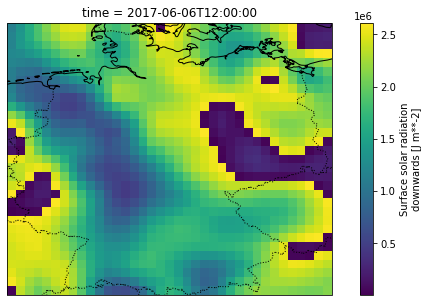

In [5]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  # PlateCarree is a common projection

ds["ssrd"].sel({"time":"2017-06-06 12:00"}).plot(ax=ax, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


This plots a single timestep of a variable on a map

# Plotting a daily cycle

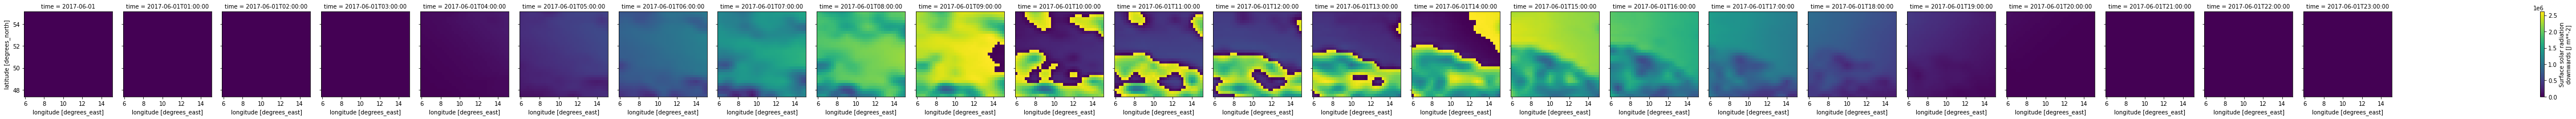

In [6]:
ds["ssrd"].sel({"time":"2017-06-01"}).plot(col="time")

You can always use the "col" argument of plotting in case of a 3D data cube that can not be plotted in a single map. In this case, the code selects one day (2017-01-01) that contains (as we have hourly data) 24 snapshots. Therefore, the col="time" argument creates 24 plots of the map

# 